<a href="https://colab.research.google.com/github/Anshii2710/CatsvsDogs/blob/main/CATSvsDOGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip #ZIP FILE

!unzip cats_and_dogs.zip #UNZIPPING

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train') #its joining path and train directory as one path since train is the directory inside the catsanddogs
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))#since test has no subdirectories we are directly adding the no of files

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3
train_image_generator = ImageDataGenerator(
       rescale=1./255,
       )
validation_image_generator = ImageDataGenerator(
       rescale=1./255,
       )

import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Create a temporary subdirectory within test_dir
temp_subdir = os.path.join(test_dir, 'temp_subdir')
os.makedirs(temp_subdir, exist_ok=True)

# 2. Move all test images into the temporary subdirectory
for filename in os.listdir(test_dir):
    if filename.endswith(('.jpg', '.png')):  # Adjust extensions if needed
        source_path = os.path.join(test_dir, filename)
        destination_path = os.path.join(temp_subdir, filename)
        shutil.move(source_path, destination_path)

# 3. Create ImageDataGenerator instance
test_image_generator = ImageDataGenerator(rescale=1./255)  # Apply preprocessing if needed



train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,  # Point to test_dir
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    shuffle=False,  # Keep shuffle=False for test data
      # Specify the temporary subdirectory as the class
    class_mode=None)

preprocessed_images = []
for _ in range(len(test_data_gen)):
    batch_images = test_data_gen.__next__()
    preprocessed_images.extend(batch_images)
preprocessed_images = np.array(preprocessed_images)

shutil.rmtree(temp_subdir)  # Remove the temporary subdirectory

# Assuming test_image_generator was declared before



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


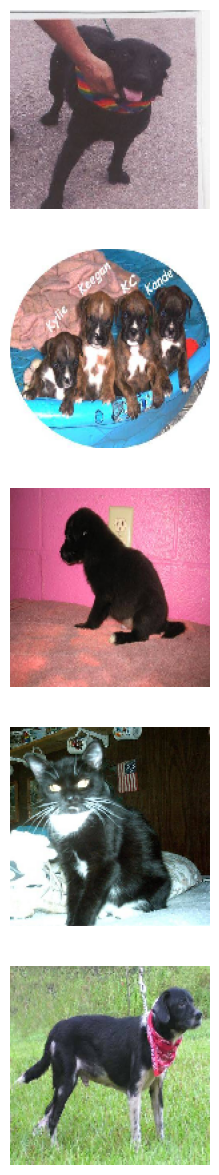

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           brightness_range=(0.5, 1.5),
                                           fill_mode='nearest')


Found 2000 images belonging to 2 classes.


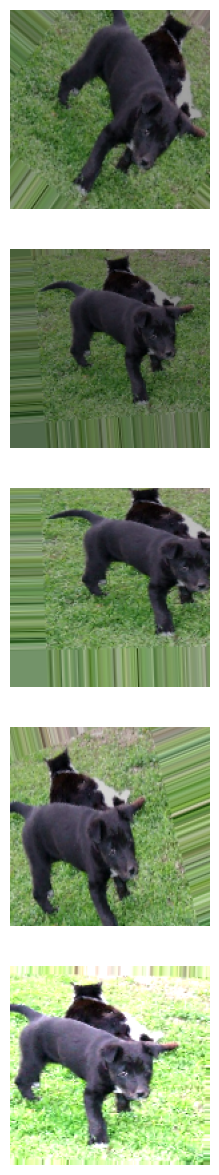

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential([
  Conv2D(32, (3,3), padding='same', activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), padding='same', activation='relu'),
  MaxPooling2D(2,2),
  Conv2D(128, (3,3), padding='same', activation='relu'),
  MaxPooling2D(2,2),
  Dropout(0.2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(1,activation='sigmoid')]
)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,401,921 (20.61 MB)

 Trainable params: 5,401,921 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
history = model.fit(
    x=train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    steps_per_epoch=total_train // batch_size,


)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 124s 8s/step - accuracy: 0.4914 - loss: 0.9204 - val_accuracy: 0.4877 - val_loss: 0.6957
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:22 6s/step - accuracy: 0.4297 - loss: 0.7031

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4297 - loss: 0.7031 - val_accuracy: 0.6058 - val_loss: 0.6861
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 120s 8s/step - accuracy: 0.5216 - loss: 0.6925 - val_accuracy: 0.5257 - val_loss: 0.6915
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.4766 - loss: 0.6930 - val_accuracy: 0.5288 - val_loss: 0.6907
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 120s 7s/step - accuracy: 0.5499 - loss: 0.6915 - val_accuracy: 0.5056 - val_loss: 0.6888
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.4453 - loss: 0.6977 - val_accuracy: 0.5192 - val_loss: 0.6819
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 133s 7s/step - accuracy: 0.5072 - loss: 0.6922 - val_accuracy: 0.5078 - val_loss: 0.6894
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.4922 - loss: 0.6914 - val_accuracy: 0.5481 - val_loss: 0.6817
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 133s 7s/step - accuracy: 0.5691 - loss: 0.6839 - val_accuracy: 0.5960 - val_loss: 0.

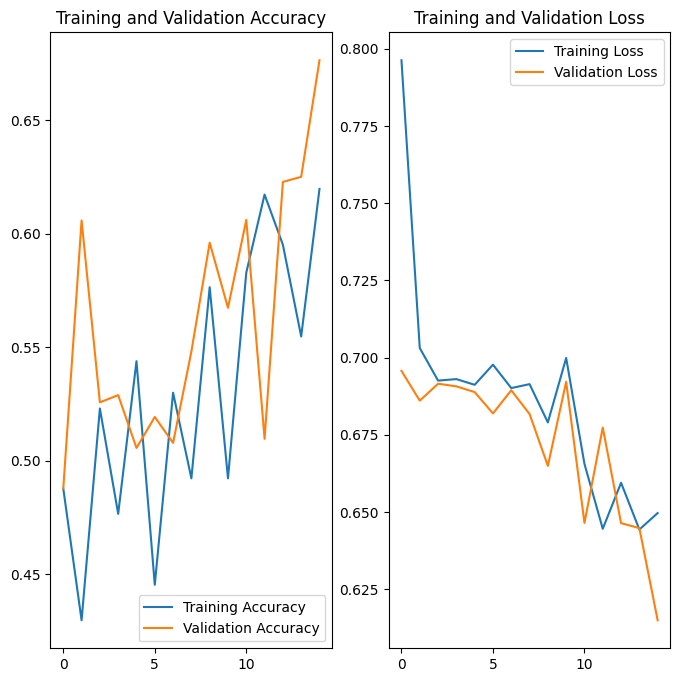

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step


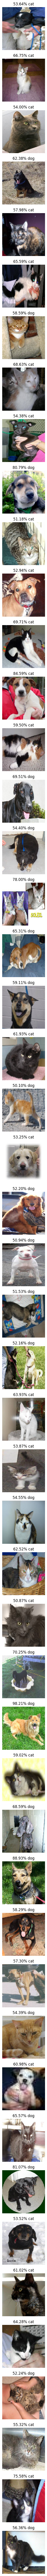

In [ ]:
predictions=model.predict(preprocessed_images)
probabilities=predictions[:,0]
plotImages(preprocessed_images, probabilities)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
